In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [ ]:
df=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


<Axes: ylabel='Frequency'>

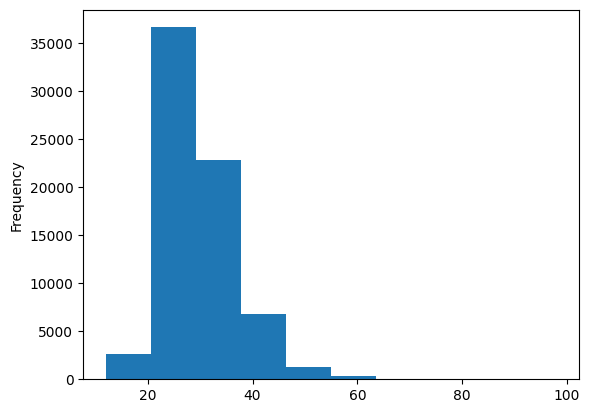

In [ ]:
df['BMI'].plot(kind='hist')

<Axes: ylabel='Frequency'>

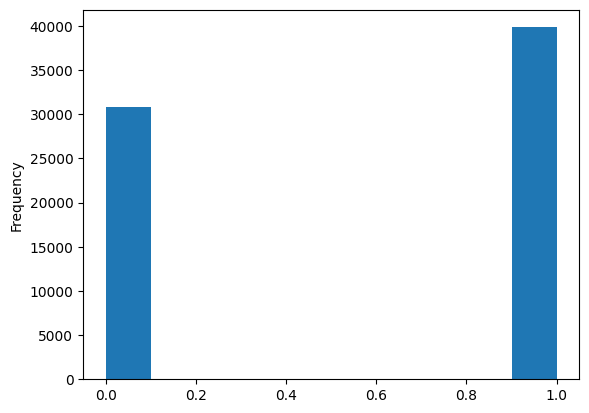

In [ ]:
df['HighBP'].plot(kind='hist')

<Axes: ylabel='Frequency'>

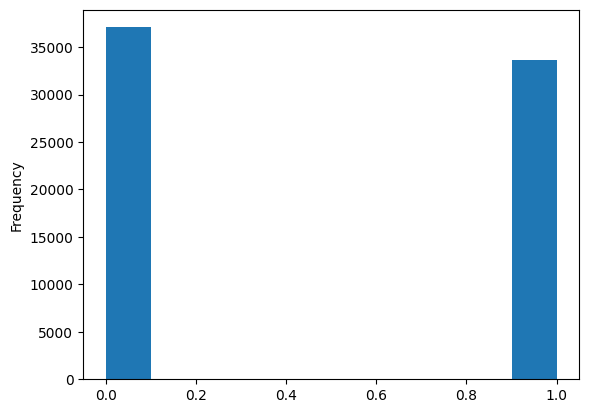

In [ ]:
df['Smoker'].plot(kind='hist')

<Axes: ylabel='Frequency'>

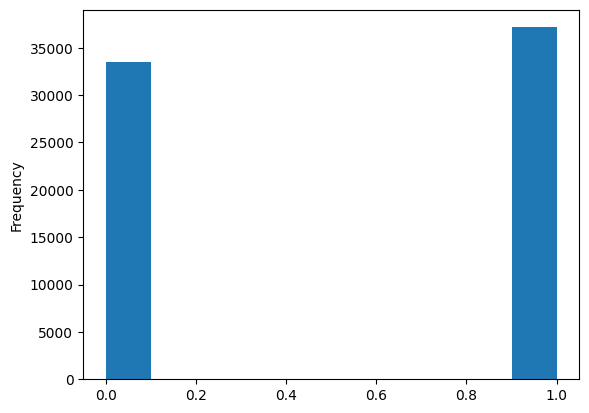

In [ ]:
df['HighChol'].plot(kind='hist')

In [ ]:
df.Diabetes_binary

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64

<Axes: title={'center': 'correlation with diabetes prediction'}>

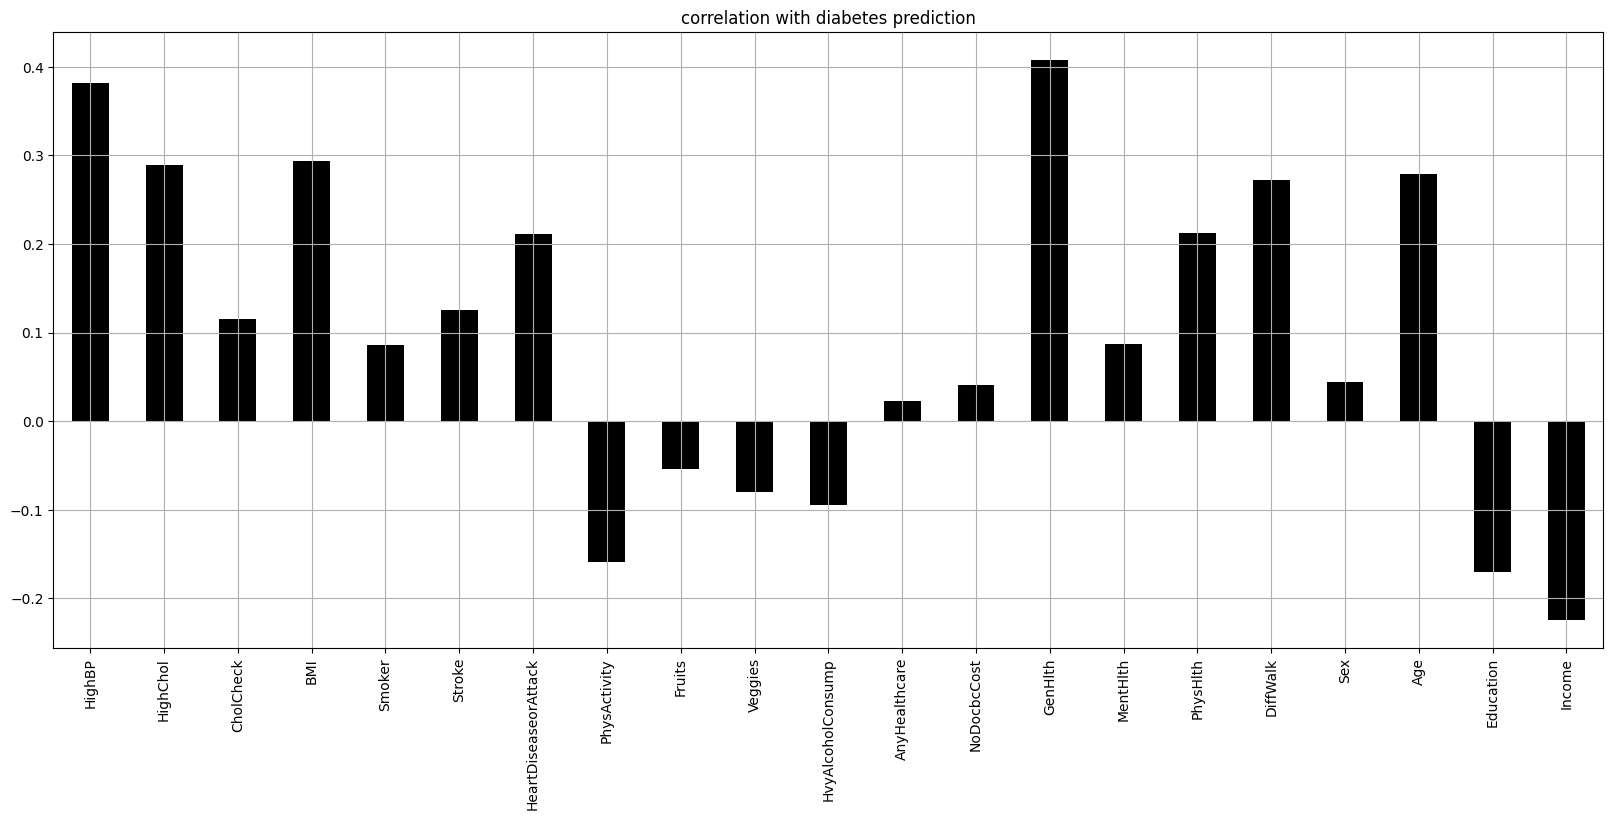

In [ ]:
df.drop('Diabetes_binary',axis=1).corrwith(df.Diabetes_binary).plot(kind='bar',grid=True,figsize=(20,8),title='correlation with diabetes prediction',color='Black')

logistic regression

In [ ]:
X=df[['BMI','HighBP']]
y=df['Diabetes_binary']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Conf matix:\n{conf_matrix}")
print(f"Classf Report: {classification_rep}")

Accuracy: 0.6927646934012306
Conf matix:
[[4488 2602]
 [1742 5307]]
Classf Report:               precision    recall  f1-score   support

         0.0       0.72      0.63      0.67      7090
         1.0       0.67      0.75      0.71      7049

    accuracy                           0.69     14139
   macro avg       0.70      0.69      0.69     14139
weighted avg       0.70      0.69      0.69     14139



In [ ]:
new_bmi=float(input('Enter BMI value:'))
new_highbp=float(input('Enter 1 if high BP, 0 if not:'))
new_data=scaler.transform([[new_bmi,new_highbp]])

prediction=model.predict(new_data)
if prediction[0]==1:
  print('the model predicts that the person is diabetic. It is advisable not to consume sugar and to exercise daily')
else:
    print('the model predicts that the person is non-diabetic. But he/she should continue to stay healthy')

Enter BMI value:34
Enter 1 if high BP, 0 if not:0
the model predicts that the person is non-diabetic. But he/she should continue to stay healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ROC curve

In [ ]:
from sklearn import metrics

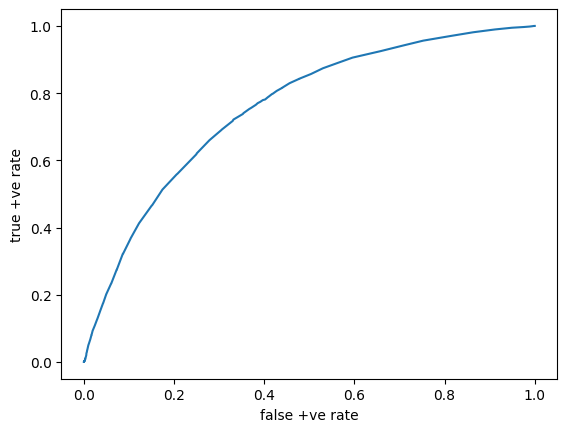

In [ ]:
y_pred=model.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)
plt.ylabel("true +ve rate")
plt.xlabel("false +ve rate")
plt.show()

In [ ]:
col_to_drop=['Income','Education','DiffWalk','PhysHlth','MentHlth','GenHlth','NoDocbcCost','AnyHealthcare','Fruits','Veggies']
df.drop(columns=col_to_drop,inplace=True)

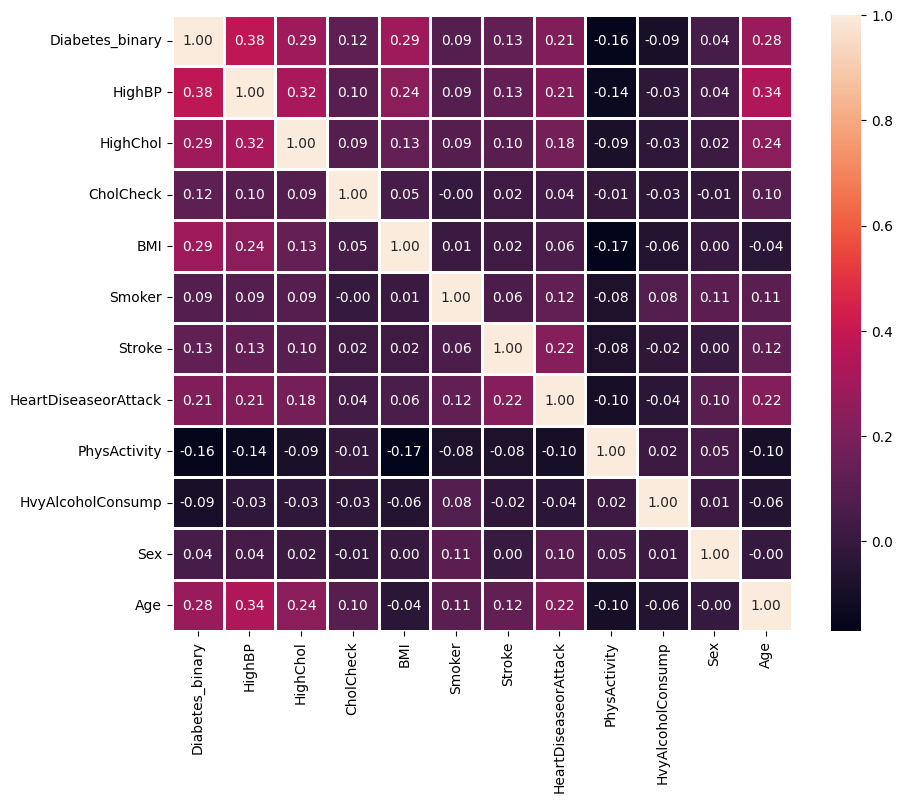

In [ ]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.8,fmt='.2f')

In [ ]:
data=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data.shape

(70692, 22)

In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 70692 rows and 12 columns


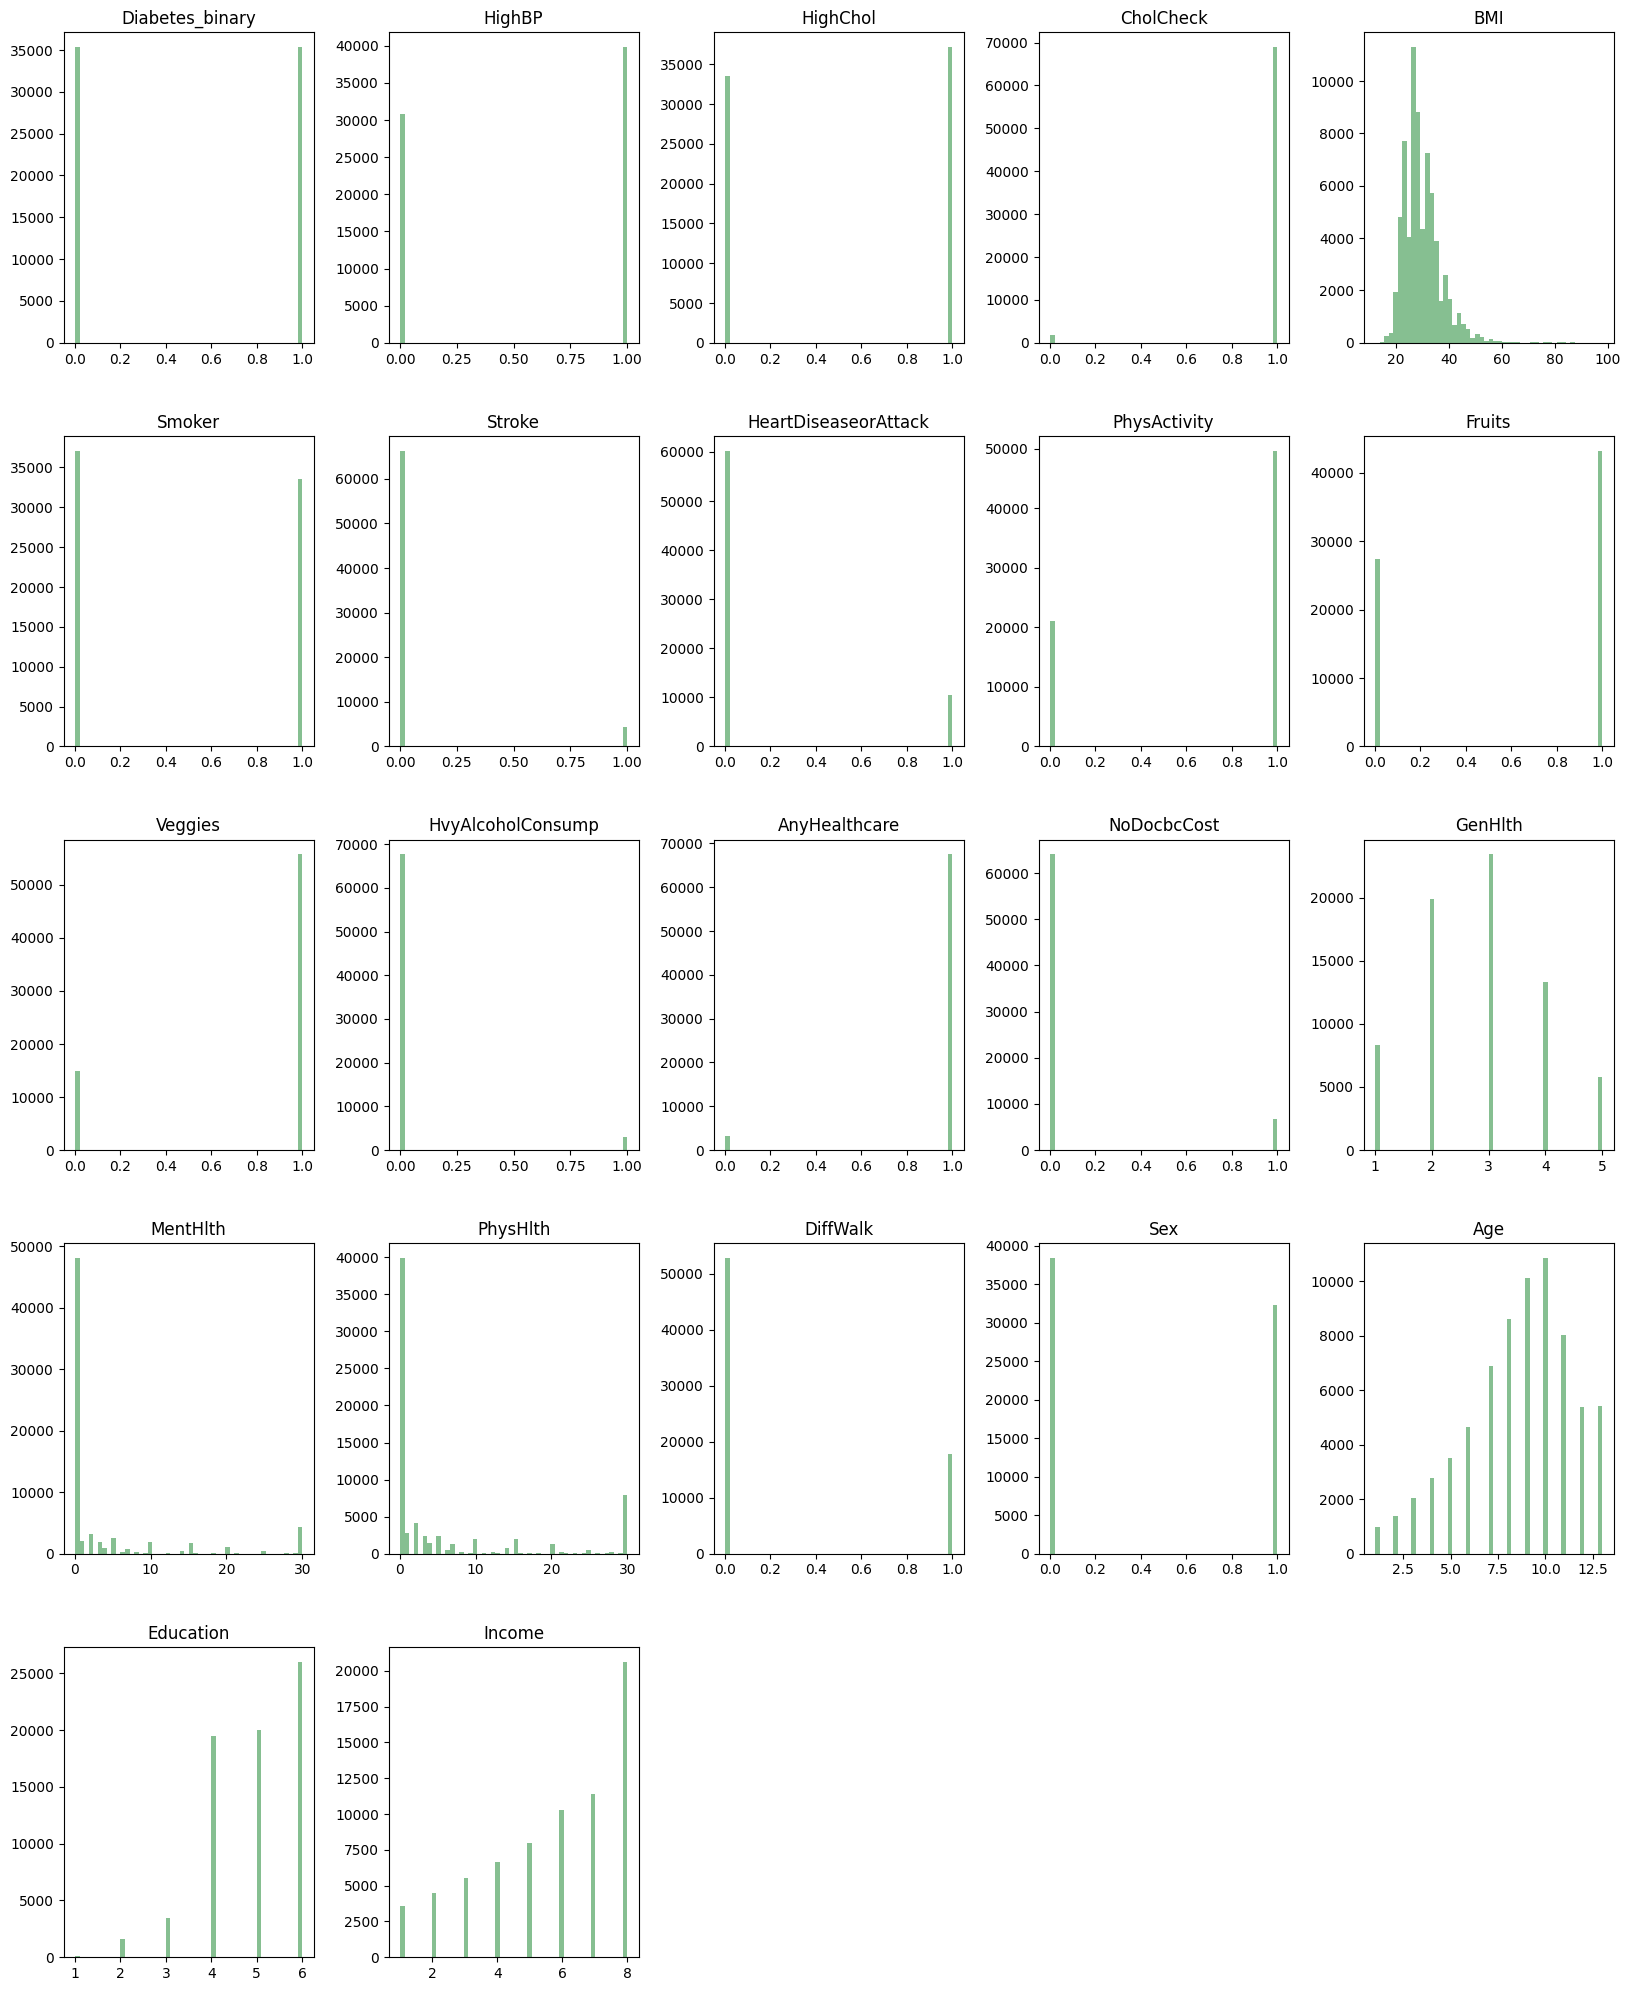

In [ ]:
ax=data.hist(bins=50,grid=False,figsize=(20,25),color='#86bf91')

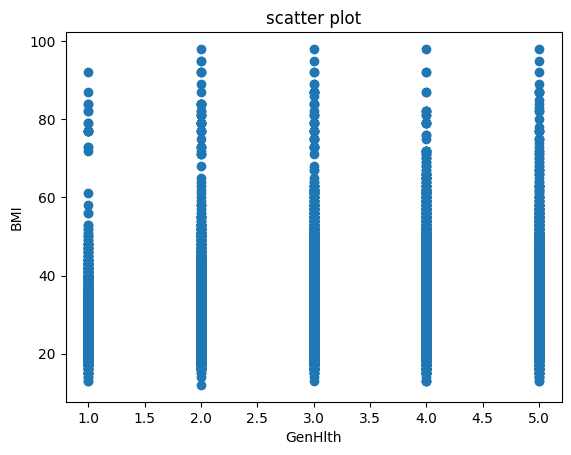

In [ ]:
plt.scatter(data['GenHlth'],data['BMI'])
plt.title("scatter plot")
plt.xlabel("GenHlth")
plt.ylabel("BMI")
plt.show()

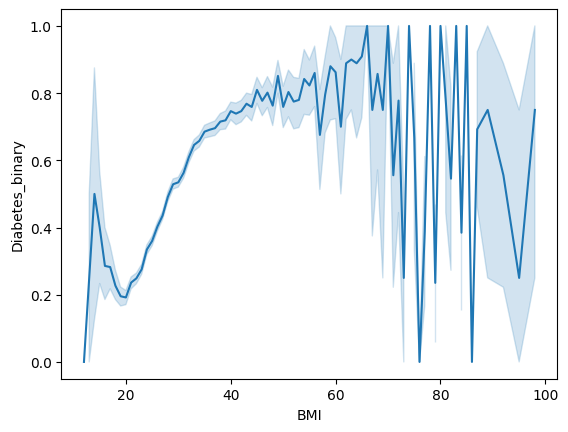

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.lineplot(x='BMI',y='Diabetes_binary',data=data)
plt.show()

In [ ]:
# figure1,plot1=plt.subplots(1,2,figsize=(8,8))
# sns.countplot(data['Diabetes_binary'],ax=plot1[0])
# labels=['non-Diabetic','Diabetic']
# plt.pie(data['Diabetes_binary'].value_counts(),labels=labels,autopct='%.02f');

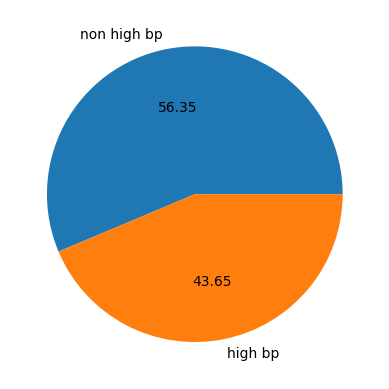

In [ ]:
labels=['non high bp','high bp']
plt.pie(data['HighBP'].value_counts(),labels=labels,autopct='%.02f');

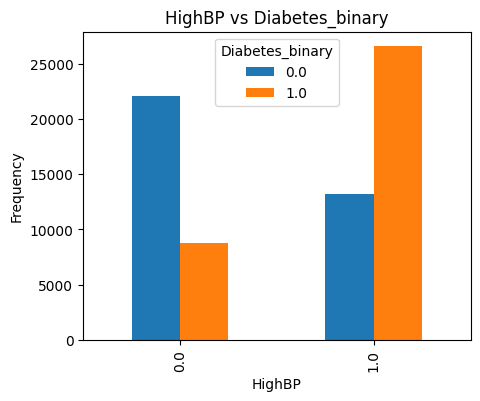

In [ ]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('HighBP vs Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.show()

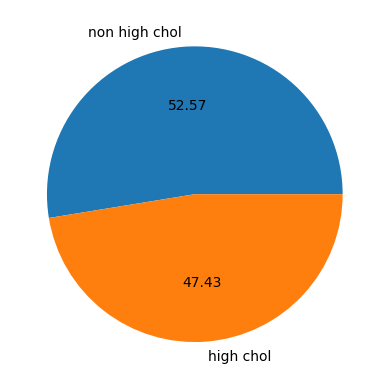

In [ ]:
labels=['non high chol','high chol']
plt.pie(data['HighChol'].value_counts(),labels=labels,autopct='%.02f');

checking the combined effect of highBP and highChol on Diabetes_binary


In [ ]:
(data.groupby(['HighBP','HighChol'])['Diabetes_binary'].value_counts()/data.groupby(['HighBP','HighChol'])['Diabetes_binary'].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                78.843295
                  1.0                21.156705
        1.0       0.0                58.125819
                  1.0                41.874181
1.0     0.0       1.0                55.359149
                  0.0                44.640851
        1.0       1.0                72.553907
                  0.0                27.446093
dtype: float64

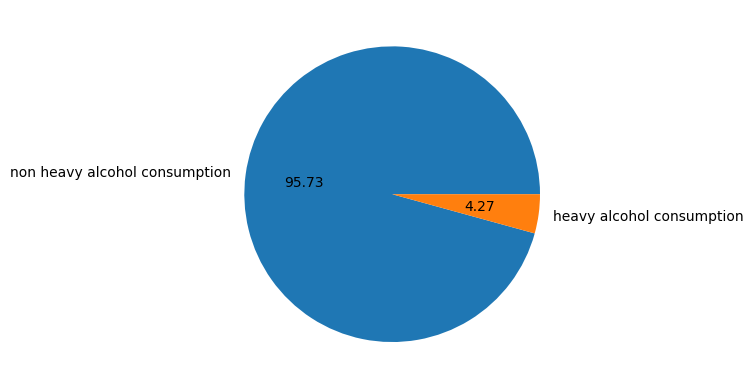

In [ ]:
labels=['non heavy alcohol consumption','heavy alcohol consumption']
plt.pie(data['HvyAlcoholConsump'].value_counts(),labels=labels,autopct='%.02f');